<a href="https://colab.research.google.com/github/itishajain15/GRIP-Internship/blob/main/GripDecisionTreeAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRIP:THE SPARKS FOUNDATION DATA SCIENE AND BUSINESS ANALYTICS(JAN-2022)**
# **Task 6 : Prediction using Decision Tree Algorithm**

# **Author** - Itisha Jain

**Problem Statement** : Predict the species of flower based on sepal length (cm), sepal width (cm), petal length (cm),petal width (cm). Create the Decision Tree Classifier and visualize it Graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

**Decision Tree Algorithm**
In this task we will predict the species of flower that a flower is expected to classify based upon the sepal, petal, lengths and widths. This is a Decision Tree task and it involves five variables.


# **Importing Libraries and Loading Iris Dataset**

In [116]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, auc
import sklearn.metrics as sm

import matplotlib.pyplot as plt
from IPython.display import Image

In [117]:
# Loading the iris dataset
iris=datasets.load_iris()

In [118]:
# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [119]:
# Forming the dependent variable
y=iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [120]:
#Creating a copy of the original Dataset
df1=df.copy()

In [158]:
df1.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [121]:
#Checkimg the shape of the dataset
df1.shape

(150, 4)

In [122]:
#Checking for null values
df1.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [123]:
df1.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [124]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## **Exploratory Data Analysis**

In [125]:
df1['Species'] = iris['target']
df1['Species'] = df1['Species'].apply(lambda x: iris['target_names'][x])

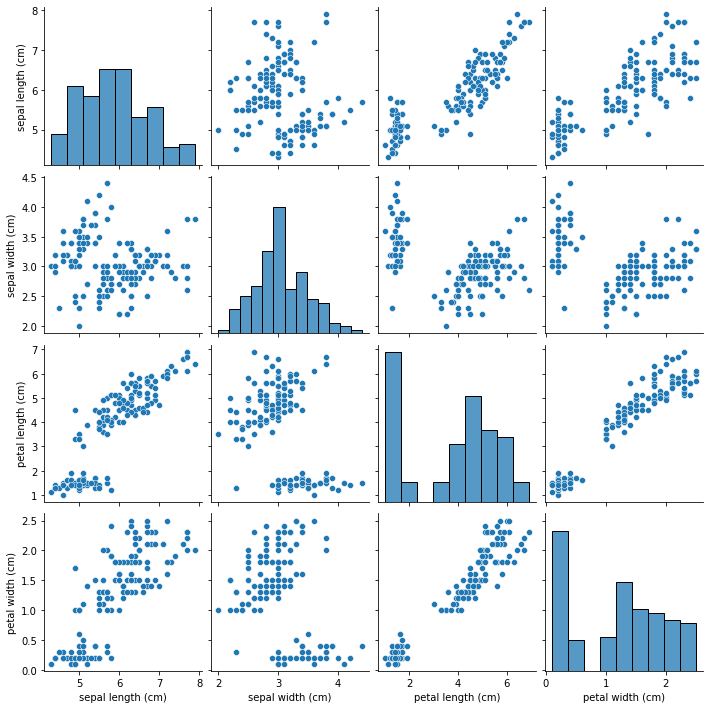

In [126]:
#Input Data Visualtization
sns.pairplot(df1)

<Figure size 1440x576 with 0 Axes>

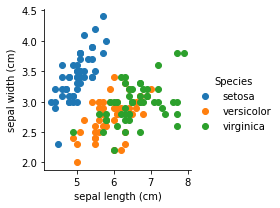

In [127]:
# Scatter plot of data based on Sepal Length and Width Features
plt.figure(figsize=(20,8))
sns.FacetGrid(df1,hue='Species').map(plt.scatter,'sepal length (cm)','sepal width (cm)').add_legend()
plt.show();

<Figure size 1440x576 with 0 Axes>

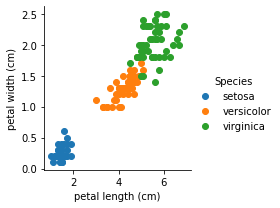

In [128]:
# Scatter plot of data based on Petal Length and Width Features
plt.figure(figsize=(20,8))
sns.FacetGrid(df1,hue='Species').map(plt.scatter,'petal length (cm)','petal width (cm)').add_legend()
plt.show();

## **Decision Tree Modelling**

In [131]:
df1.drop(columns='Species',inplace=True)

In [132]:
# Data Standadization

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(df1))
MinMaxScaler()
print(scaler.transform(df1))

MinMaxScaler(copy=True, feature_range=(0, 1))
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0

In [133]:
#model training
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.25, random_state=1)

In [136]:
# Defining the decision tree algorithm
Species_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=15, random_state=0)
Species_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=15,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [137]:
y_predicted = Species_classifier.predict(X_test)

In [138]:
y_predicted[:10]

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2])

In [139]:
y_test[:10]

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2])

In [144]:
# Measure Accuracy of the Classifier
print("Accuracy of the Model: ",sm.accuracy_score(y_test,y_predicted)*100,"%")

Accuracy of the Model:  97.36842105263158 %


### Visulaizing Decision Tree

In [152]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y
!pip install six 
import six
import sys
sys.modules['sklearn.externals.six'] = six

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [153]:
# Import necessary libraries for graph viz
from six import StringIO
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

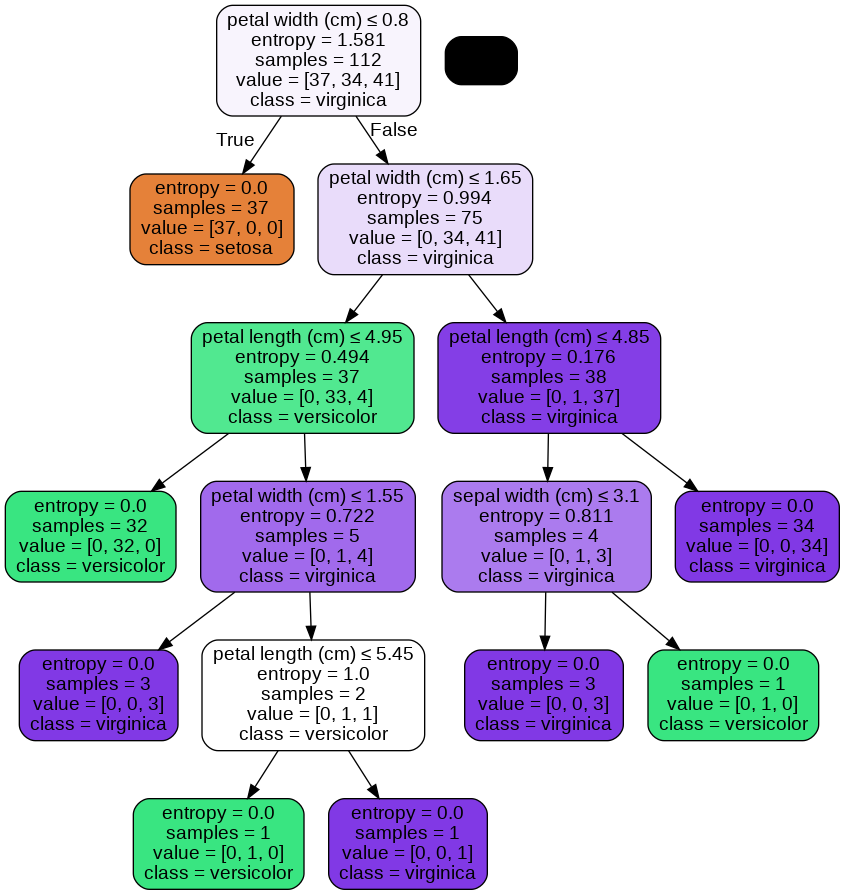

In [157]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(Species_classifier, out_file=dot_data, feature_names=iris.feature_names, class_names=['setosa', 'versicolor', 'virginica'] , 
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [159]:
print("Accuracy of the Model: ",sm.accuracy_score(y_test,y_predicted)*100,"%")

Accuracy of the Model:  97.36842105263158 %


# ***THANK YOU***

